--- Starting Task 3: Model Explainability (explainability.ipynb) ---
Datasets loaded successfully from '../data/'!
Applying IP to Country mapping for Fraud_Data...
IP to Country mapping complete!
Extracting time-based and velocity features for Fraud_Data...
Feature Engineering complete for Fraud_Data.

DEBUG: Fraud_Data numerical features (before pipeline): ['purchase_value', 'age', 'hour_of_day', 'day_of_week', 'day_of_year', 'month_of_year', 'week_of_year', 'time_since_signup_seconds', 'time_diff_user', 'time_diff_device', 'device_transaction_count', 'user_transaction_count']
DEBUG: Fraud_Data categorical features (before pipeline): ['source', 'browser', 'sex', 'country']
DEBUG: Number of numerical features: 12
DEBUG: Number of categorical features: 4
Preprocessing pipeline for Fraud_Data defined.

DEBUG: CreditCard_Data numerical features (before pipeline): ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', '

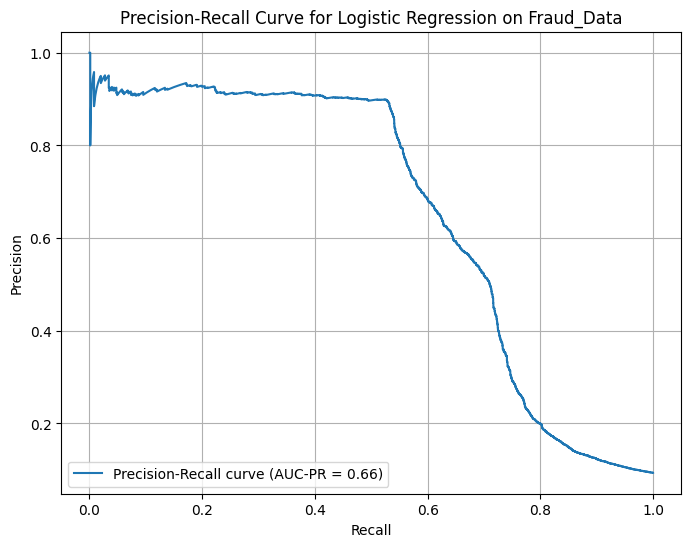

Training LightGBM for Fraud_Data...
[LightGBM] [Info] Number of positive: 109568, number of negative: 109568
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13580
[LightGBM] [Info] Number of data points in the train set: 219136, number of used features: 125
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

--- LightGBM on Fraud_Data Evaluation Summary ---
F1-Score: 0.6910
AUC-ROC: 0.8445
AUC-PR: 0.7141
Confusion Matrix:
[[27387     6]
 [ 1333  1497]]


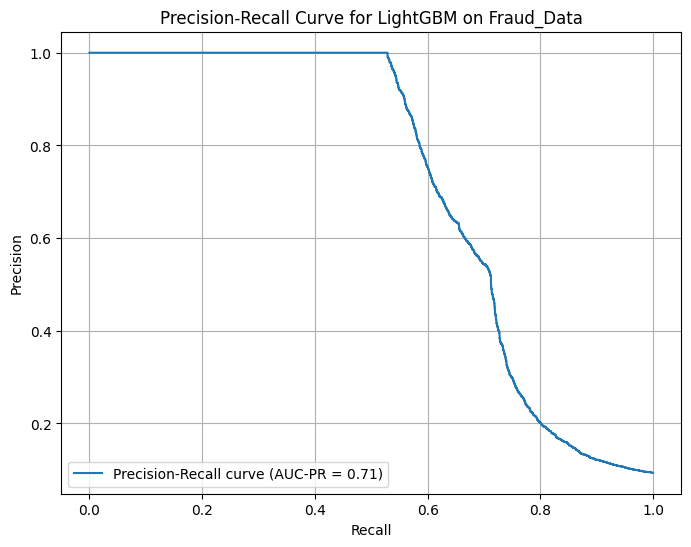


========== Training Models for CreditCard_Data ==========
Training Logistic Regression for CreditCard_Data...

--- Logistic Regression on CreditCard_Data Evaluation Summary ---
F1-Score: 0.0987
AUC-ROC: 0.9625
AUC-PR: 0.7164
Confusion Matrix:
[[55147  1504]
 [   12    83]]


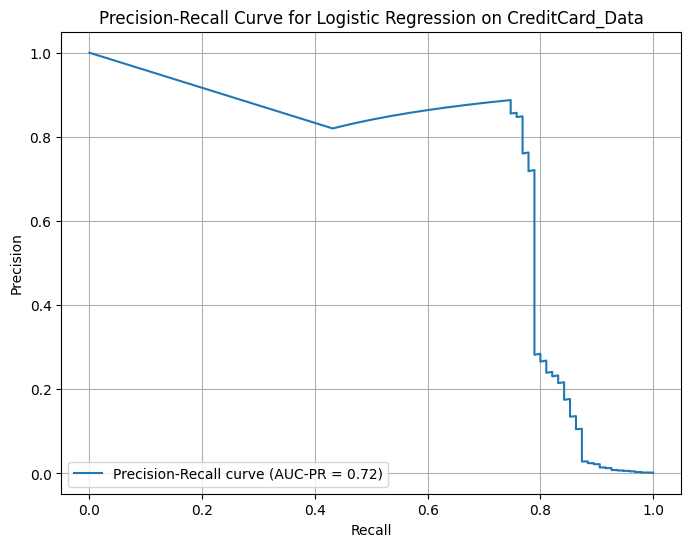

Training LightGBM for CreditCard_Data...
[LightGBM] [Info] Number of positive: 22660, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 249262, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090908 -> initscore=-2.302594
[LightGBM] [Info] Start training from score -2.302594

--- LightGBM on CreditCard_Data Evaluation Summary ---
F1-Score: 0.8488
AUC-ROC: 0.9723
AUC-PR: 0.8038
Confusion Matrix:
[[56647     4]
 [   22    73]]


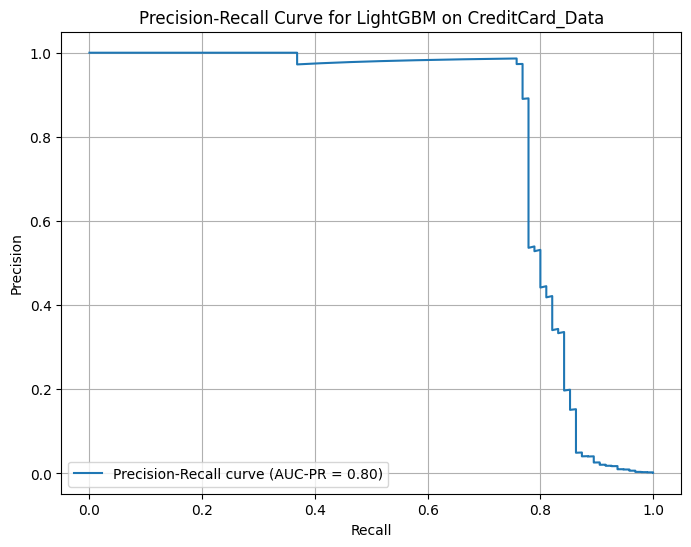


--- Task 2 Model Training complete. Proceeding to Task 3. ---

--- Starting Task 3: Model Explainability (explainability.ipynb) ---

========== SHAP Explanation for Fraud_Data (LightGBM) ==========
DEBUG: Shape of X_test_processed_fraud_dense BEFORE DataFrame creation: (30223, 200)
DEBUG: Length of feature_names_fraud: 200
DEBUG: First 5 feature names for Fraud_Data: ['purchase_value', 'age', 'hour_of_day', 'day_of_week', 'day_of_year']
DEBUG: Type of first feature name: <class 'str'>


DEBUG SHAP (Fraud): Min SHAP value: -4.266544601863001
DEBUG SHAP (Fraud): Max SHAP value: 8.108923922688373
DEBUG SHAP (Fraud): Mean SHAP value: -0.025710251727528298
DEBUG SHAP (Fraud): Std Dev SHAP value: 0.26143871257122464
DEBUG SHAP (Fraud): NaNs in SHAP values: 0
DEBUG SHAP (Fraud): Infs in SHAP values: 0

SHAP Summary Plot for Fraud_Data (Global Feature Importance)


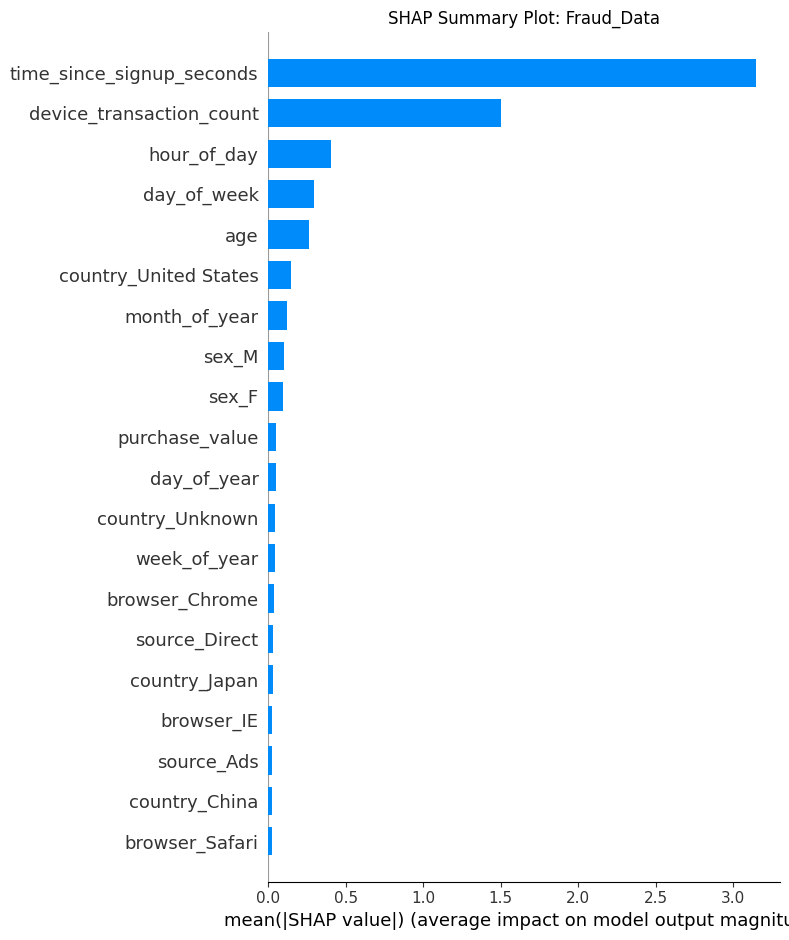


SHAP Force Plot for a specific (fraudulent) transaction (Positional Index: 2)

SHAP Force Plot for a specific (non-fraudulent) transaction (Positional Index: 0)

========== SHAP Explanation for CreditCard_Data (LightGBM) ==========
DEBUG: Shape of X_test_processed_credit_dense BEFORE DataFrame creation: (56746, 30)
DEBUG: Length of feature_names_credit: 30
DEBUG: First 5 feature names for CreditCard_Data: ['Time', 'V1', 'V2', 'V3', 'V4']
DEBUG: Type of first feature name: <class 'str'>
DEBUG SHAP (CreditCard): Min SHAP value: -5.778482370258186
DEBUG SHAP (CreditCard): Max SHAP value: 13.510220230096214
DEBUG SHAP (CreditCard): Mean SHAP value: -0.07713570830991455
DEBUG SHAP (CreditCard): Std Dev SHAP value: 0.6223858028022767
DEBUG SHAP (CreditCard): NaNs in SHAP values: 0
DEBUG SHAP (CreditCard): Infs in SHAP values: 0

SHAP Summary Plot for CreditCard_Data (Global Feature Importance)


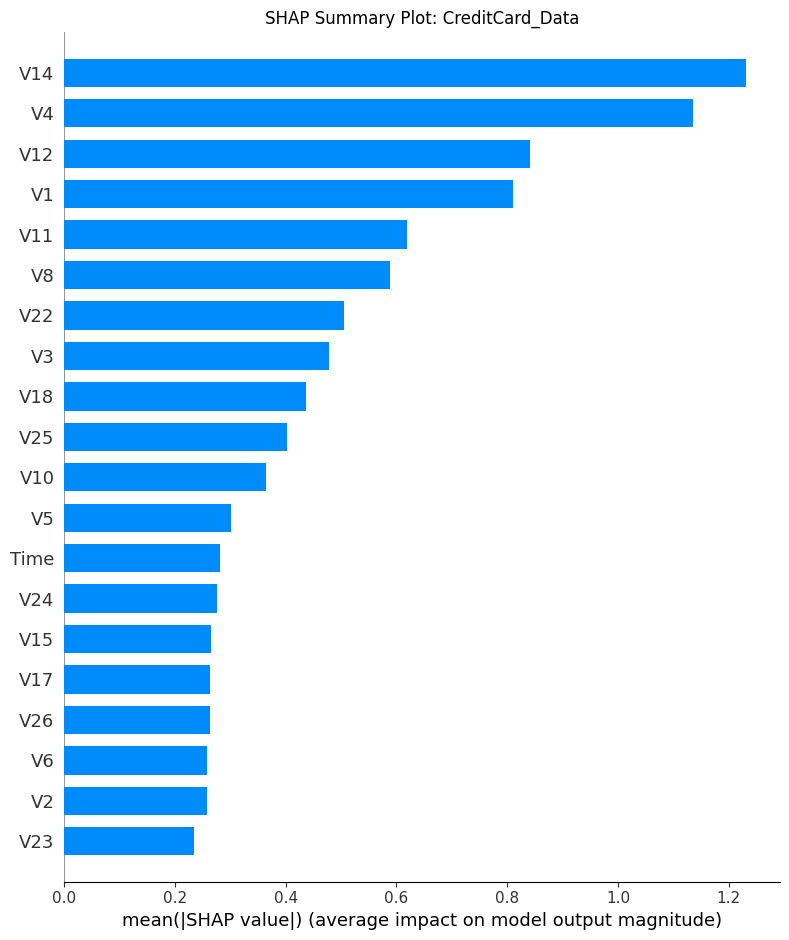


SHAP Force Plot for a specific (fraudulent) transaction (Positional Index: 845)

--- Task 3: Model Explainability (explainability.ipynb) complete. ---


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, precision_recall_curve, auc, average_precision_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
import shap # Import SHAP library
import warnings

# Suppress warnings for cleaner output in the notebook
warnings.filterwarnings('ignore')

print("--- Starting Task 3: Model Explainability (explainability.ipynb) ---")

# --- ALL CODE FROM Task 1 (eda.ipynb) GOES HERE ---
# This ensures explainability.ipynb is self-contained and has all data prepared.

# --- 1. Load Datasets (from Task 1) ---
try:
    fraud_data = pd.read_csv('../data/Fraud_Data.csv')
    ip_to_country = pd.read_csv('../data/IpAddress_to_Country.csv')
    credit_card_data = pd.read_csv('../data/creditcard.csv')
    print("Datasets loaded successfully from '../data/'!")
except FileNotFoundError as e:
    print(f"Error loading files. Ensure your data files are in the 'data/' directory relative to this notebook: {e}")
    raise SystemExit("Data files not found. Please check paths and directory structure.")

# --- 2. Handle Missing Values (from Task 1) ---
# (As noted in Task 1, no explicit NaNs in raw data, handled by imputer in pipeline for engineered features)

# --- 3. Data Cleaning (from Task 1) ---
fraud_data.drop_duplicates(inplace=True)
ip_to_country.drop_duplicates(inplace=True)
credit_card_data.drop_duplicates(inplace=True)

fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
fraud_data['ip_address'] = pd.to_numeric(fraud_data['ip_address'], errors='coerce')
initial_fraud_rows = len(fraud_data)
fraud_data.dropna(subset=['ip_address'], inplace=True)
if len(fraud_data) < initial_fraud_rows:
    print(f"Dropped {initial_fraud_rows - len(fraud_data)} rows from Fraud_Data due to invalid IP addresses.")
fraud_data['ip_address'] = fraud_data['ip_address'].astype(np.int64)

ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].astype(np.int64)
ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].astype(np.int64)

# --- 4. EDA (from Task 1) ---
# (Plots and descriptive stats are typically for EDA. We won't re-run plot generation here
# to keep this notebook focused on explainability, but the data transformations from EDA are crucial.)

# --- 5. Merge Datasets for Geolocation Analysis (from Task 1) ---
ip_to_country_sorted = ip_to_country.sort_values(by='lower_bound_ip_address').reset_index(drop=True)

def get_country(ip_address, ip_ranges_df):
    idx = ip_ranges_df['lower_bound_ip_address'].searchsorted(ip_address, side='right') - 1
    if idx >= 0 and ip_address <= ip_ranges_df.loc[idx, 'upper_bound_ip_address']:
        return ip_ranges_df.loc[idx, 'country']
    return 'Unknown'

print("Applying IP to Country mapping for Fraud_Data...")
fraud_data['country'] = fraud_data['ip_address'].apply(lambda x: get_country(x, ip_to_country_sorted))
print("IP to Country mapping complete!")

# --- 6. Feature Engineering (from Task 1) ---
print("Extracting time-based and velocity features for Fraud_Data...")
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek
fraud_data['day_of_year'] = fraud_data['purchase_time'].dt.dayofyear
fraud_data['month_of_year'] = fraud_data['purchase_time'].dt.month
fraud_data['week_of_year'] = fraud_data['purchase_time'].dt.isocalendar().week.astype(int)
fraud_data['time_since_signup_seconds'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds()
fraud_data['time_since_signup_seconds'] = fraud_data['time_since_signup_seconds'].apply(lambda x: max(0, x))

fraud_data = fraud_data.sort_values(by=['user_id', 'purchase_time']).reset_index(drop=True)
fraud_data['time_diff_user'] = fraud_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds()
fraud_data['time_diff_user'].fillna(0, inplace=True)

fraud_data = fraud_data.sort_values(by=['device_id', 'purchase_time']).reset_index(drop=True)
fraud_data['time_diff_device'] = fraud_data.groupby('device_id')['purchase_time'].diff().dt.total_seconds()
fraud_data['time_diff_device'].fillna(0, inplace=True)

fraud_data['device_transaction_count'] = fraud_data.groupby('device_id')['purchase_time'].transform('count')
fraud_data['user_transaction_count'] = fraud_data.groupby('user_id')['purchase_time'].transform('count')
print("Feature Engineering complete for Fraud_Data.")

# --- 7. Data Transformation (Define Pipelines - from Task 1) ---
# Define features for transformation pipelines for Fraud_Data
X_fraud_pre_split = fraud_data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'class'], axis=1)
y_fraud_pre_split = fraud_data['class']

numerical_features_fraud = X_fraud_pre_split.select_dtypes(include=np.number).columns.tolist()
categorical_features_fraud = X_fraud_pre_split.select_dtypes(include='object').columns.tolist()

print(f"\nDEBUG: Fraud_Data numerical features (before pipeline): {numerical_features_fraud}")
print(f"DEBUG: Fraud_Data categorical features (before pipeline): {categorical_features_fraud}")
print(f"DEBUG: Number of numerical features: {len(numerical_features_fraud)}")
print(f"DEBUG: Number of categorical features: {len(categorical_features_fraud)}")

# Preprocessing Pipeline Setup for Fraud_Data
numerical_transformer_fraud = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer_fraud = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor_fraud = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_fraud, numerical_features_fraud),
        ('cat', categorical_transformer_fraud, categorical_features_fraud)
    ],
    remainder='passthrough'
)
print("Preprocessing pipeline for Fraud_Data defined.")

# Define features for transformation pipelines for CreditCard_Data
X_credit_pre_split = credit_card_data.drop(['Class'], axis=1)
y_credit_pre_split = credit_card_data['Class']

numerical_features_credit = X_credit_pre_split.columns.tolist() # All features are numerical

print(f"\nDEBUG: CreditCard_Data numerical features (before pipeline): {numerical_features_credit}")
print(f"DEBUG: Number of numerical features: {len(numerical_features_credit)}")


# Preprocessing Pipeline Setup for CreditCard_Data
numerical_transformer_credit = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor_credit = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_credit, numerical_features_credit)
    ],
    remainder='passthrough'
)
print("Preprocessing pipeline for CreditCard_Data defined.")

print("\n--- Task 1 Data Preparation complete. Proceeding to Task 2. ---")


# --- ALL CODE FROM Task 2 (modeling.ipynb) GOES HERE ---
# This ensures explainability.ipynb is self-contained and has all models trained.

# --- 8. Data Preparation: Separate features and target, and perform a train-test split. ---
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
    X_fraud_pre_split, y_fraud_pre_split, test_size=0.2, random_state=42, stratify=y_fraud_pre_split
)
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(
    X_credit_pre_split, y_credit_pre_split, test_size=0.2, random_state=42, stratify=y_credit_pre_split
)
print("\nTrain-Test splits complete.")

# --- 9. Model Selection ---
# Models will be defined within the pipelines below.

# --- 10. Model Training and Evaluation ---
def evaluate_model(model, X_test, y_test, model_name, dataset_name):
    """
    Evaluates a trained model and prints performance metrics suitable for imbalanced data.
    Plots the Precision-Recall Curve. (Simplified for explainability notebook)
    """
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_pr = auc(recall, precision)
    avg_precision = average_precision_score(y_test, y_proba)

    print(f"\n--- {model_name} on {dataset_name} Evaluation Summary ---")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"AUC-PR: {auc_pr:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    # Plotting is optional here to reduce output, but kept for completeness
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (AUC-PR = {auc_pr:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name} on {dataset_name}')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

    return {'F1': f1, 'AUC-ROC': auc_roc, 'AUC-PR': auc_pr, 'Confusion Matrix': cm}


# Model Training for Fraud_Data
print("\n========== Training Models for Fraud_Data ==========")
pipeline_lr_fraud = ImbPipeline(steps=[
    ('preprocessor', preprocessor_fraud),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'))
])
print("Training Logistic Regression for Fraud_Data...")
pipeline_lr_fraud.fit(X_train_fraud, y_train_fraud)
metrics_lr_fraud = evaluate_model(pipeline_lr_fraud, X_test_fraud, y_test_fraud, "Logistic Regression", "Fraud_Data")

pipeline_lgbm_fraud = ImbPipeline(steps=[
    ('preprocessor', preprocessor_fraud),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LGBMClassifier(random_state=42, n_estimators=500, learning_rate=0.05, num_leaves=31))
])
print("Training LightGBM for Fraud_Data...")
pipeline_lgbm_fraud.fit(X_train_fraud, y_train_fraud)
metrics_lgbm_fraud = evaluate_model(pipeline_lgbm_fraud, X_test_fraud, y_test_fraud, "LightGBM", "Fraud_Data")


# Model Training for CreditCard_Data
print("\n========== Training Models for CreditCard_Data ==========")
pipeline_lr_credit = ImbPipeline(steps=[
    ('preprocessor', preprocessor_credit),
    ('smote', SMOTE(random_state=42, sampling_strategy=0.1)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'))
])
print("Training Logistic Regression for CreditCard_Data...")
pipeline_lr_credit.fit(X_train_credit, y_train_credit)
metrics_lr_credit = evaluate_model(pipeline_lr_credit, X_test_credit, y_test_credit, "Logistic Regression", "CreditCard_Data")

pipeline_lgbm_credit = ImbPipeline(steps=[
    ('preprocessor', preprocessor_credit),
    ('smote', SMOTE(random_state=42, sampling_strategy=0.1)),
    ('classifier', LGBMClassifier(random_state=42, n_estimators=500, learning_rate=0.05, num_leaves=31))
])
print("Training LightGBM for CreditCard_Data...")
pipeline_lgbm_credit.fit(X_train_credit, y_train_credit)
metrics_lgbm_credit = evaluate_model(pipeline_lgbm_credit, X_test_credit, y_test_credit, "LightGBM", "CreditCard_Data")

print("\n--- Task 2 Model Training complete. Proceeding to Task 3. ---")


# --- Task 3: Model Explainability ---

# Assuming LightGBM is the best performing model for both datasets for explainability.
# You would justify this choice based on the metrics from Task 2.
print("\n--- Starting Task 3: Model Explainability (explainability.ipynb) ---")

# --- Explainability for Fraud_Data (using pipeline_lgbm_fraud) ---
print("\n========== SHAP Explanation for Fraud_Data (LightGBM) ==========")

# 1. Get the preprocessed test data and feature names
# Access the *fitted* preprocessor from the trained pipeline
fitted_preprocessor_fraud = pipeline_lgbm_fraud.named_steps['preprocessor']

# Transform the test data using the *fitted* preprocessor
X_test_processed_fraud = fitted_preprocessor_fraud.transform(X_test_fraud)

# Ensure X_test_processed_fraud is a dense NumPy array
if hasattr(X_test_processed_fraud, 'toarray'):
    X_test_processed_fraud_dense = X_test_processed_fraud.toarray()
else:
    X_test_processed_fraud_dense = X_test_processed_fraud

# Get feature names after preprocessing
numeric_features_after_trans_fraud = numerical_features_fraud

# Get one-hot encoded feature names from the fitted preprocessor
ohe_fraud = fitted_preprocessor_fraud.named_transformers_['cat'].named_steps['onehot']
categorical_feature_names_fraud = ohe_fraud.get_feature_names_out(categorical_features_fraud)

# Combine all feature names
feature_names_fraud = list(numeric_features_after_trans_fraud) + list(categorical_feature_names_fraud)

# Debug prints to verify shapes and lengths
print(f"DEBUG: Shape of X_test_processed_fraud_dense BEFORE DataFrame creation: {X_test_processed_fraud_dense.shape}")
print(f"DEBUG: Length of feature_names_fraud: {len(feature_names_fraud)}")
print(f"DEBUG: First 5 feature names for Fraud_Data: {feature_names_fraud[:5]}")
print(f"DEBUG: Type of first feature name: {type(feature_names_fraud[0])}")

# Convert processed data to DataFrame for easier SHAP handling and plotting
X_test_processed_df_fraud = pd.DataFrame(X_test_processed_fraud_dense, columns=feature_names_fraud)

# Initialize JS for SHAP plots in notebooks - often needed for interactive plots, good practice for all.
shap.initjs()

# Create a SHAP explainer for the trained LGBM classifier
lgbm_classifier_fraud = pipeline_lgbm_fraud.named_steps['classifier']

# Use TreeExplainer for tree-based models like LightGBM
explainer_fraud = shap.TreeExplainer(lgbm_classifier_fraud)
shap_values_fraud = explainer_fraud.shap_values(X_test_processed_df_fraud)

# For binary classification, shap_values often returns a list [shap_values_for_class_0, shap_values_for_class_1]
# We are interested in the positive class (fraud, which is class 1)
if isinstance(shap_values_fraud, list):
    shap_values_fraud_positive = shap_values_fraud[1]
else:
    shap_values_fraud_positive = shap_values_fraud

# Debug SHAP values for Fraud_Data
print(f"DEBUG SHAP (Fraud): Min SHAP value: {np.min(shap_values_fraud_positive)}")
print(f"DEBUG SHAP (Fraud): Max SHAP value: {np.max(shap_values_fraud_positive)}")
print(f"DEBUG SHAP (Fraud): Mean SHAP value: {np.mean(shap_values_fraud_positive)}")
print(f"DEBUG SHAP (Fraud): Std Dev SHAP value: {np.std(shap_values_fraud_positive)}")
print(f"DEBUG SHAP (Fraud): NaNs in SHAP values: {np.sum(np.isnan(shap_values_fraud_positive))}")
print(f"DEBUG SHAP (Fraud): Infs in SHAP values: {np.sum(np.isinf(shap_values_fraud_positive))}")


# 1. SHAP Summary Plot (Global Feature Importance)
print("\nSHAP Summary Plot for Fraud_Data (Global Feature Importance)")
# Add checks for empty data or SHAP values before plotting
if X_test_processed_df_fraud.empty or shap_values_fraud_positive.size == 0 or np.sum(np.isnan(shap_values_fraud_positive)) > 0 or np.sum(np.isinf(shap_values_fraud_positive)) > 0:
    print("Warning: SHAP Summary Plot for Fraud_Data cannot be generated. Data/SHAP values might be empty or contain NaNs/Infs.")
else:
    # Use shap.summary_plot with plot_type="bar" and pass X_test_processed_df_fraud directly
    shap.summary_plot(shap_values_fraud_positive, X_test_processed_df_fraud, plot_type="bar", show=False)
    plt.title("SHAP Summary Plot: Fraud_Data")
    plt.tight_layout()
    plt.show()

# 2. SHAP Force Plot (Local Feature Importance for a single prediction)
# Select an example: find an actual fraudulent transaction from the test set
# Get the *positional* indices of fraudulent transactions in y_test_fraud
# y_test_fraud.reset_index(drop=True) creates a Series with a new RangeIndex (0, 1, 2...)
# We then find the index (position) of the first '1'
fraud_ilocs = y_test_fraud.reset_index(drop=True)[y_test_fraud.reset_index(drop=True) == 1].index
if not fraud_ilocs.empty:
    # Get the first positional index of a fraudulent sample
    first_fraud_iloc = fraud_ilocs[0]
    X_fraud_example = X_test_processed_df_fraud.iloc[first_fraud_iloc]

    print(f"\nSHAP Force Plot for a specific (fraudulent) transaction (Positional Index: {first_fraud_iloc})")
    # Use the positional index for shap_values_fraud_positive as well
    if shap_values_fraud_positive.size > first_fraud_iloc:
        shap.force_plot(explainer_fraud.expected_value, shap_values_fraud_positive[first_fraud_iloc], X_fraud_example)
        plt.show()
    else:
        print(f"Warning: SHAP values for index {first_fraud_iloc} not available for Fraud_Data Force Plot.")
else:
    print("No fraudulent examples found in the test set for Force Plot demonstration (Fraud_Data).")


# Select a non-fraudulent example for Fraud_Data to compare
non_fraud_ilocs = y_test_fraud.reset_index(drop=True)[y_test_fraud.reset_index(drop=True) == 0].index
if not non_fraud_ilocs.empty:
    first_non_fraud_iloc = non_fraud_ilocs[0]
    X_non_fraud_example = X_test_processed_df_fraud.iloc[first_non_fraud_iloc]
    print(f"\nSHAP Force Plot for a specific (non-fraudulent) transaction (Positional Index: {first_non_fraud_iloc})")
    if shap_values_fraud_positive.size > first_non_fraud_iloc:
        shap.force_plot(explainer_fraud.expected_value, shap_values_fraud_positive[first_non_fraud_iloc], X_non_fraud_example)
        plt.show()
    else:
        print(f"Warning: SHAP values for index {first_non_fraud_iloc} not available for Fraud_Data Non-Fraud Force Plot.")


# --- Explainability for CreditCard_Data (using pipeline_lgbm_credit) ---
print("\n========== SHAP Explanation for CreditCard_Data (LightGBM) ==========")

# 1. Get the preprocessed test data and feature names
# Access the *fitted* preprocessor from the trained pipeline
fitted_preprocessor_credit = pipeline_lgbm_credit.named_steps['preprocessor']

# Transform the test data using the *fitted* preprocessor
X_test_processed_credit = fitted_preprocessor_credit.transform(X_test_credit)

# Ensure X_test_processed_credit is a dense NumPy array
if hasattr(X_test_processed_credit, 'toarray'):
    X_test_processed_credit_dense = X_test_processed_credit.toarray()
else:
    X_test_processed_credit_dense = X_test_processed_credit

feature_names_credit = numerical_features_credit # For credit card, only numerical, so names are preserved

# Debug prints to verify shapes and lengths
print(f"DEBUG: Shape of X_test_processed_credit_dense BEFORE DataFrame creation: {X_test_processed_credit_dense.shape}")
print(f"DEBUG: Length of feature_names_credit: {len(feature_names_credit)}")
print(f"DEBUG: First 5 feature names for CreditCard_Data: {feature_names_credit[:5]}")
print(f"DEBUG: Type of first feature name: {type(feature_names_credit[0])}")

X_test_processed_df_credit = pd.DataFrame(X_test_processed_credit_dense, columns=feature_names_credit)

lgbm_classifier_credit = pipeline_lgbm_credit.named_steps['classifier']
explainer_credit = shap.TreeExplainer(lgbm_classifier_credit)
shap_values_credit = explainer_credit.shap_values(X_test_processed_df_credit)

if isinstance(shap_values_credit, list):
    shap_values_credit_positive = shap_values_credit[1]
else:
    shap_values_credit_positive = shap_values_credit

# Debug SHAP values for CreditCard_Data
print(f"DEBUG SHAP (CreditCard): Min SHAP value: {np.min(shap_values_credit_positive)}")
print(f"DEBUG SHAP (CreditCard): Max SHAP value: {np.max(shap_values_credit_positive)}")
print(f"DEBUG SHAP (CreditCard): Mean SHAP value: {np.mean(shap_values_credit_positive)}")
print(f"DEBUG SHAP (CreditCard): Std Dev SHAP value: {np.std(shap_values_credit_positive)}")
print(f"DEBUG SHAP (CreditCard): NaNs in SHAP values: {np.sum(np.isnan(shap_values_credit_positive))}")
print(f"DEBUG SHAP (CreditCard): Infs in SHAP values: {np.sum(np.isinf(shap_values_credit_positive))}")


# 1. SHAP Summary Plot (Global Feature Importance)
print("\nSHAP Summary Plot for CreditCard_Data (Global Feature Importance)")
# Add checks for empty data or SHAP values before plotting
if X_test_processed_df_credit.empty or shap_values_credit_positive.size == 0 or np.sum(np.isnan(shap_values_credit_positive)) > 0 or np.sum(np.isinf(shap_values_credit_positive)) > 0:
    print("Warning: SHAP Summary Plot for CreditCard_Data cannot be generated. Data/SHAP values might be empty or contain NaNs/Infs.")
else:
    # Use shap.summary_plot with plot_type="bar" and pass X_test_processed_df_credit directly
    shap.summary_plot(shap_values_credit_positive, X_test_processed_df_credit, plot_type="bar", show=False)
    plt.title("SHAP Summary Plot: CreditCard_Data")
    plt.tight_layout()
    plt.show()

# 2. SHAP Force Plot (Local Feature Importance)
# Get the *positional* indices of fraudulent transactions in y_test_credit
fraud_ilocs_credit = y_test_credit.reset_index(drop=True)[y_test_credit.reset_index(drop=True) == 1].index
if not fraud_ilocs_credit.empty:
    first_fraud_iloc_credit = fraud_ilocs_credit[0]
    X_credit_example = X_test_processed_df_credit.iloc[first_fraud_iloc_credit]

    print(f"\nSHAP Force Plot for a specific (fraudulent) transaction (Positional Index: {first_fraud_iloc_credit})")
    if shap_values_credit_positive.size > first_fraud_iloc_credit:
        shap.force_plot(explainer_credit.expected_value, shap_values_credit_positive[first_fraud_iloc_credit], X_credit_example)
        plt.show()
    else:
        print(f"Warning: SHAP values for index {first_fraud_iloc_credit} not available for CreditCard_Data Force Plot.")
else:
    print("No fraudulent examples found in the CreditCard test set for Force Plot demonstration.")

print("\n--- Task 3: Model Explainability (explainability.ipynb) complete. ---")
